TO: EE 021 Grader
FROM: Matthew Lansing
DATE: 12/09/2024
SUBJ: Analysis of a combination of four methods for reading MNIST handwriting numberals.

Reflection:
Logistic Regression, PCA, and KNN were used from the library SKLEARN to train several machine learning models to read numerals from the NIST albums. Of the methods tested,
the KNN without PCA was found to offer the greatest accuracy on the training data. With this metric, it was determined KNN without PCA should be used for the Kaggle submission. 

All of the algorithms did not require significiant effort to utilize due to the use of the SKLEARN libarary. 

Moving forward, more algorithms should be investigated and compared. SKLEARN has over a 100 image processing techniques and algorithms. Future efforts, therefore, should first 
develop a standardized function for combining and analyzing algorithms and image processing techniques.

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import time

In [72]:
#1. load data into datafarame
method_reports = []

TRAIN_PATH = "train.csv"
train_df = pd.read_csv(TRAIN_PATH)

x = train_df.drop("label", axis = "columns")
y = train_df.label

In [73]:
#LOGISTIC REGRESSION, NO PCA
#scale, split and train
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) #"Standardize features by removing the mean and scaling to unit variance"

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 30)

In [74]:
#LOGISTIC REGRESSION, NO PCA
#train the model
model_LR = LogisticRegression(max_iter=1000) #1000 is enough.
model_LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
#LOGISTIC REGRESSION, NO PCA
#predict and generate metrics
prediction = model_LR.predict(x_test)

report = ["Logistic Regression, without PCA"]
report.append(prediction)
report.append(accuracy_score(y_test, prediction))
report.append(metrics.confusion_matrix(y_test, prediction))
report.append(len(x_train[0]))
method_reports.append(report)

In [76]:
#LOGISTIC REGRESSION, WITH PCA
#train the model
pca = PCA(0.9) #keep 90% of useful
x_pca = pca.fit_transform(x)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size = 0.2, random_state = 30)

In [77]:
#LOGISTIC REGRESSION, WITH PCA
#train the model
try:
    model_LR_PCA = LogisticRegression(max_iter=1000) #1000 is enough.
except:
    print("In the interest of the demonstration time, the iterations are capped at 1000.")
model_LR_PCA.fit(x_train_pca, y_train_pca)

c:\Users\mjlan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [78]:
#LOGISTIC REGRESSION, WITH PCA
#predict and generate metrics
prediction = model_LR_PCA.predict(x_test_pca)

report = ["Logistic Regression, with PCA"]
report.append(prediction)
report.append(accuracy_score(y_test_pca, prediction))
report.append(metrics.confusion_matrix(y_test_pca, prediction))
report.append(len(x_train[0]))
method_reports.append(report)

In [79]:
#KNN without PCA
#create model
model_KNN = KNeighborsClassifier() #would be better called "model"
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, test_size = 0.2, random_state = 30)
model_KNN.fit(x_train_knn, y_train_knn)

KNeighborsClassifier()

In [80]:
#KNN without PCA
#predict and generate metrics
prediction = model_KNN.predict(x_test_knn)

report = ["KNN without PCA"]
report.append(prediction)
report.append(accuracy_score(y_test_knn, prediction))
report.append(metrics.confusion_matrix(y_test_knn, prediction))
report.append(len(x_train[0]))
method_reports.append(report)

In [81]:
#KNN with PCA
pca = PCA(0.9) #keep 90% of useful
x_pca = pca.fit_transform(x)

model_KNN_PCA = KNeighborsClassifier() 
x_train_knn_pca, x_test_knn_pca, y_train_knn_pca, y_test_knn_pca = train_test_split(x_pca, y, test_size = 0.2, random_state = 30)
model_KNN_PCA.fit(x_train_knn_pca, y_train_knn_pca)

KNeighborsClassifier()

In [82]:
#KNN with PCA
#predict and generate metrics
prediction = model_KNN_PCA.predict(x_test_knn_pca)

report = ["KNN with PCA"]
report.append(prediction)
report.append(accuracy_score(y_test_knn, prediction))
report.append(metrics.confusion_matrix(y_test_knn, prediction))
report.append(len(x_train[0]))
method_reports.append(report)

4 different classifiers were analyzed.
Logistic Regression, without PCA has accuracy 0.9017857142857143.
A visualization of the Predictions and Labels with be printed. 
The Confusion Matrix will also be printed. 


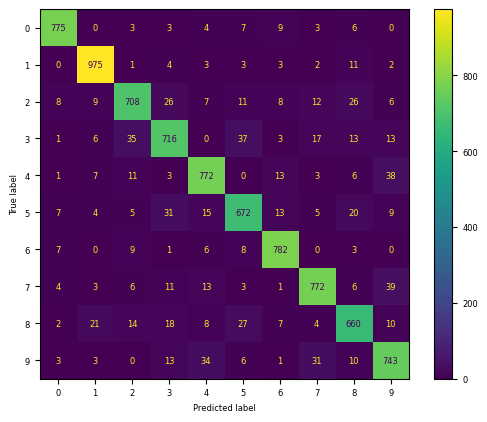

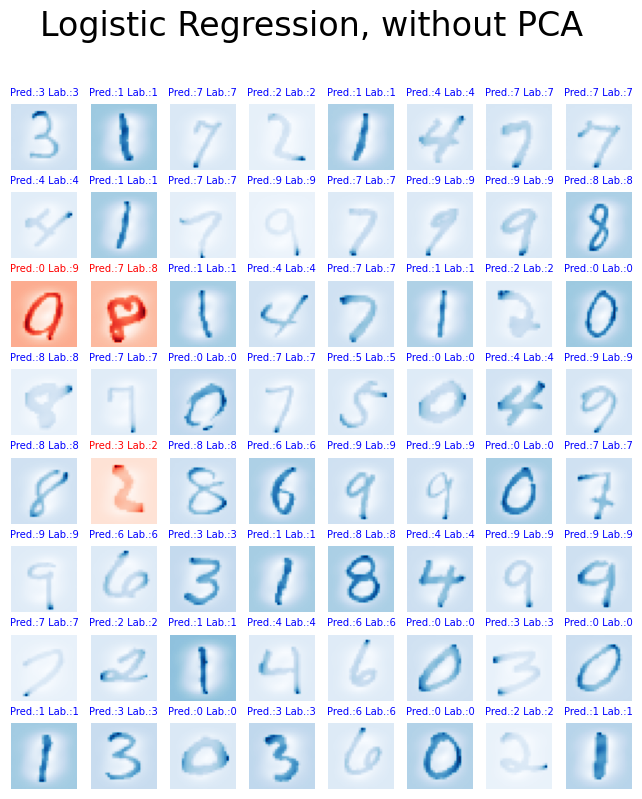

Logistic Regression, with PCA has accuracy 0.9145238095238095.
A visualization of the Predictions and Labels with be printed. 
The Confusion Matrix will also be printed. 


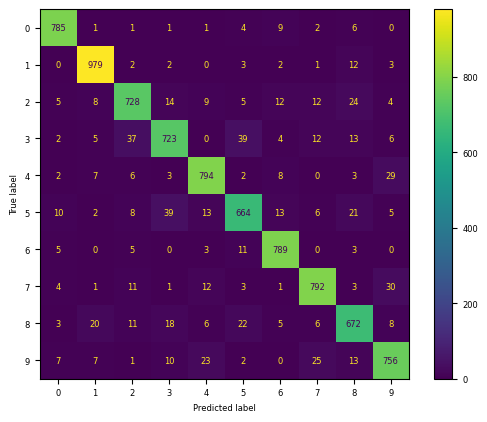

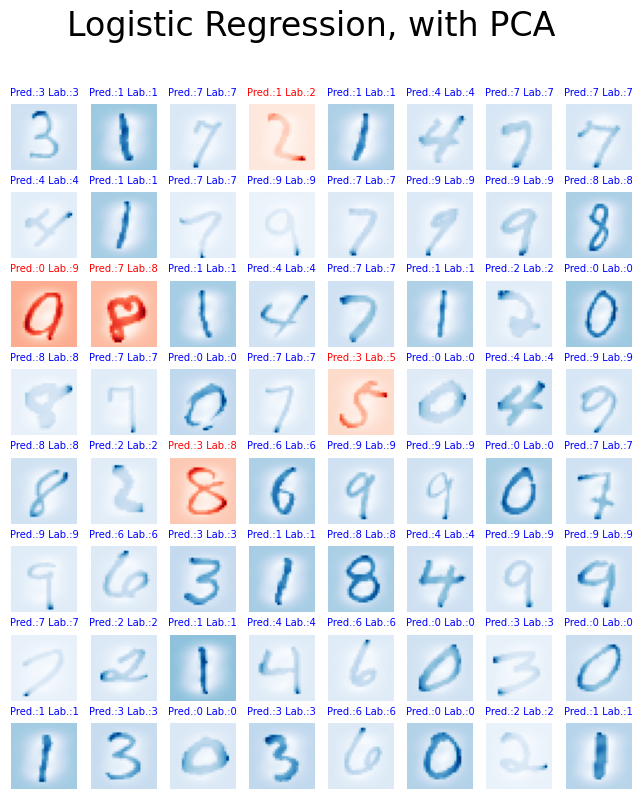

KNN without PCA has accuracy 0.9692857142857143.
A visualization of the Predictions and Labels with be printed. 
The Confusion Matrix will also be printed. 


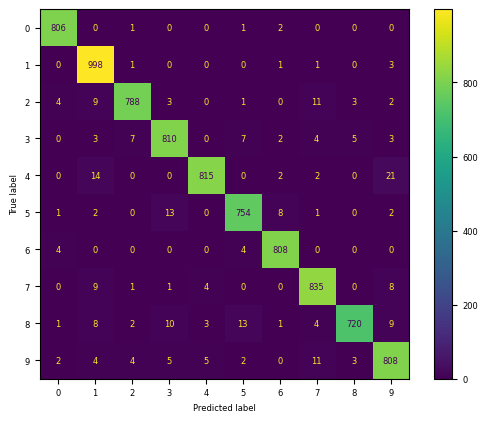

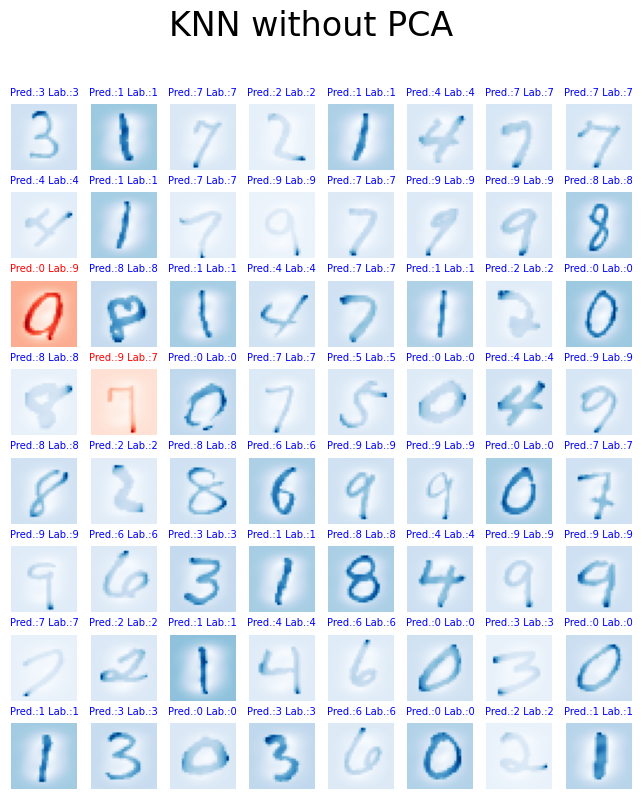

KNN with PCA has accuracy 0.9735714285714285.
A visualization of the Predictions and Labels with be printed. 
The Confusion Matrix will also be printed. 


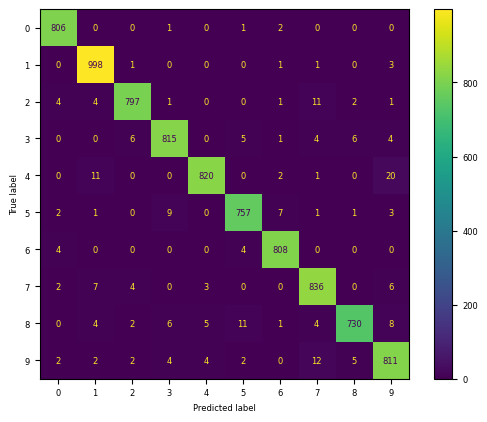

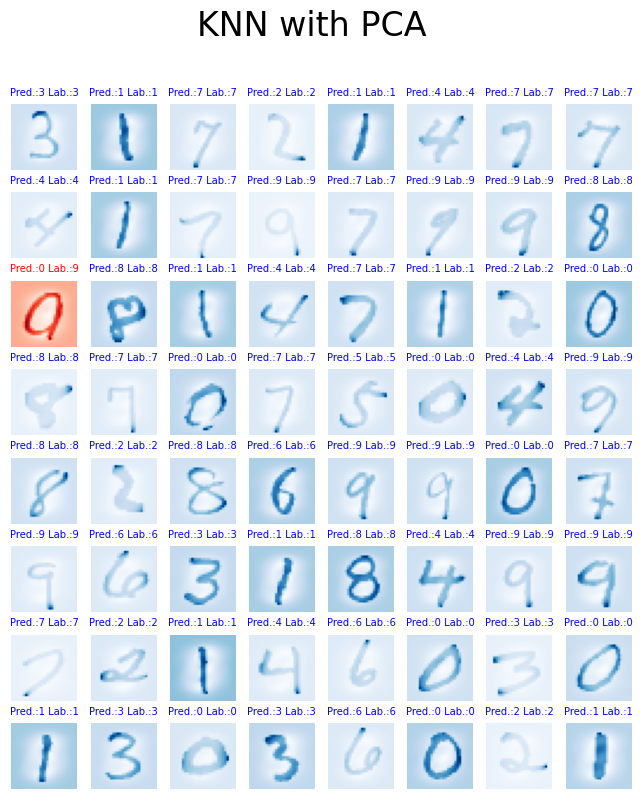

In [83]:
def plot_predictions(predictions, x, y, title = "Untitled"):
    fig, axes = plt.subplots(nrows =8, ncols = 8, figsize=(8,9))
    plt.rcParams.update({'font.size': 20})
    plt.suptitle(title)
    plt.rcParams.update({'font.size': 6})
    for i, ax in enumerate(axes.flat):
        plot_color = "Blues"
        label_color = "b"
        if(predictions[i] != y.iloc[i]):
            plot_color = "Reds"
            label_color = "r"
        ax.imshow(x[i].reshape(28, 28), cmap=plot_color)
        
        ax.set_title(f"Pred.:{predictions[i]} Lab.:{y.iloc[i]}", color = label_color) #.iloc must be used. "integer location"
        ax.axis('off')
    plt.show()

print(len(method_reports),"different classifiers were analyzed.")
for method in method_reports:
    print(method[0],"has accuracy", str(method[2]) + ".\nA visualization of the Predictions and Labels with be printed. \nThe Confusion Matrix will also be printed. ")
    ConfusionMatrixDisplay(confusion_matrix=method[3]).plot()
    plot_predictions(method[1], x_test, y_test, method[0]) 
    time.sleep(4)
#classifcation_report(labels, predict, output_dict=True)

In [ ]:
submission_writer = open("submission_file.csv", "w")
TEST_PATH = "test.csv"
x = pd.read_csv(TEST_PATH)
prediction = model_KNN.predict(x)
ImageId = 1
submission_writer.write("ImageId,Label\n")
for predicted_digit in prediction: #0: default & LOG, #1: PCA & LOG, #2: KNN, #3: PCA & KNN 
    line = str(ImageId) +","+ str(predicted_digit) + "\n"
    submission_writer.write(line)
    ImageId+=1

submission_writer.close()

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0  